In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.style.use('dark_background')

In [4]:
df = pd.read_csv("D:\Books\data\AirPassengers.csv")
print(df.dtypes)

Month         object
Passengers     int64
dtype: object


In [5]:
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


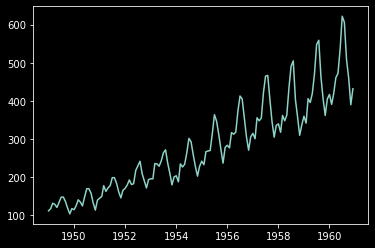

In [6]:
df.set_index('Month', inplace=True) 

plt.plot(df['Passengers'])


In [7]:
from pmdarima.arima import ADFTest

ModuleNotFoundError: No module named 'pmdarima'

In [8]:
pip install pmdarima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [9]:
from pmdarima.arima import ADFTest

In [10]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

In [11]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.991880243437641  if above 0.05, data is not stationary


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

In [13]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

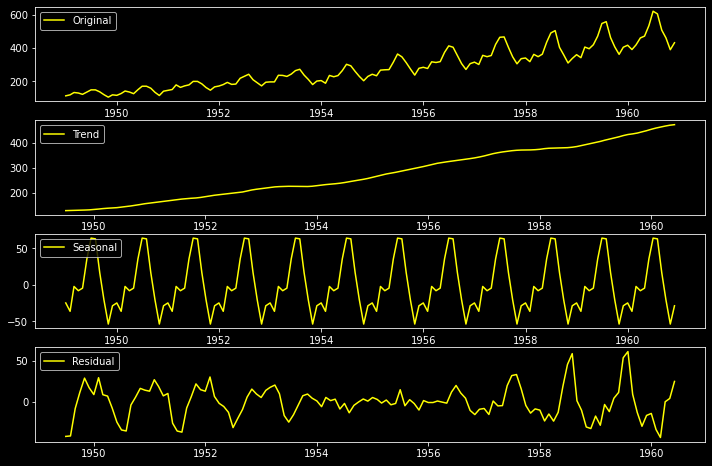

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()


In [15]:
from pmdarima.arima import auto_arima

In [16]:
arima_model = auto_arima(df['Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)    

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.33 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.38 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.25 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.52 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [17]:
print(arima_model.summary() )

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 10 Mar 2023   AIC                           1019.178
Time:                                     22:47:39   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [18]:
size = int(len(df) * 0.66)
X_train, X_test = df[0:size], df[size:len(df)]

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [20]:
model = SARIMAX(X_train['Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

C:\Users\LAXITA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LAXITA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.268
Date:                            Fri, 10 Mar 2023   AIC                            610.536
Time:                                    22:48:08   BIC                            622.569
Sample:                                01-01-1949   HQIC                           615.367
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3194      0.101     -3.161      0.002      -0.517      -0.121
ar.S.L12       0.6848      0.539      1.271      0.204      -0.371       1.740
ar.S.L24       0.3145      0.124      2.533      0.011       0.071       0.558
ma.S.L12      -0.9854      6.123     -0.161      0.872     -12.987      11.016
sigma2        78.3723    436.550      0.180      0.858    -777.250     933.995
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 


In [22]:
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted passengers') 

<AxesSubplot:xlabel='Month'>

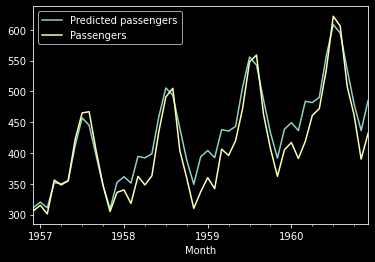

In [24]:
prediction.plot(legend = True) 
X_test['Passengers'].plot(legend = True) 


In [25]:
import math
from sklearn.metrics import mean_squared_error

In [26]:
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.14 RMSE
Test Score: 29.34 RMSE


In [27]:
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  

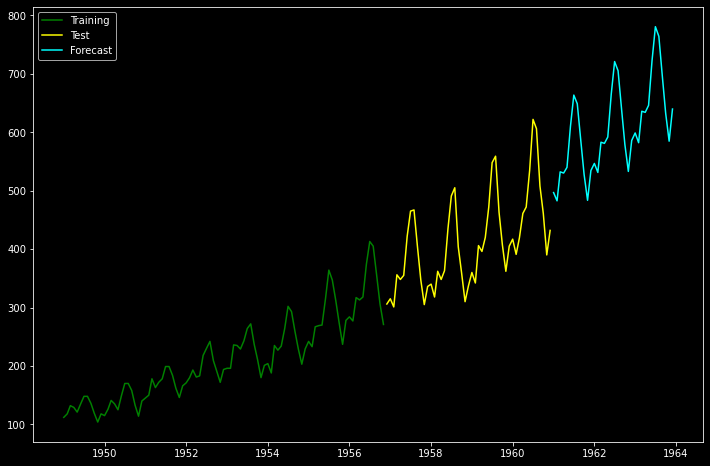

In [29]:
plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='upper left')
plt.show()